 Global stiffness matrix: 
[[ 1.000e-02  0.000e+00  0.000e+00 -5.000e-03  0.000e+00 -2.000e-03
  -5.000e-03  0.000e+00  7.000e-03  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -2.800e+00  0.000e+00
   0.000e+00 -2.800e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [-1.400e-02  0.000e+00  2.800e-02  7.000e-03  0.000e+00  7.000e-03
  -7.000e-03  0.000e+00  7.000e-03  0.000e+00  0.000e+00  0.000e+00]
 [-5.000e-03  0.000e+00  7.000e-03 -2.095e+00  0.000e+00  7.000e-03
   0.000e+00  0.000e+00  0.000e+00 -2.100e+00  0.000e+00  0.000e+00]
 [ 0.000e+00 -2.800e+00  0.000e+00  0.000e+00 -2.798e+00 -4.000e-03
   0.000e+00  0.000e+00  0.000e+00  0.000e+00 -2.000e-03 -4.000e-03]
 [-7.000e-03  0.000e+00  7.000e-03 -7.000e-03  4.000e-03  2.400e-02
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  4.000e-03  5.000e-03]
 [-5.000e-03  0.000e+00 -2.000e-03  0.000e+00  0.000e+00  0.000e+00
   5.000e-03  0.000e+00 -7.000e-03  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00 -

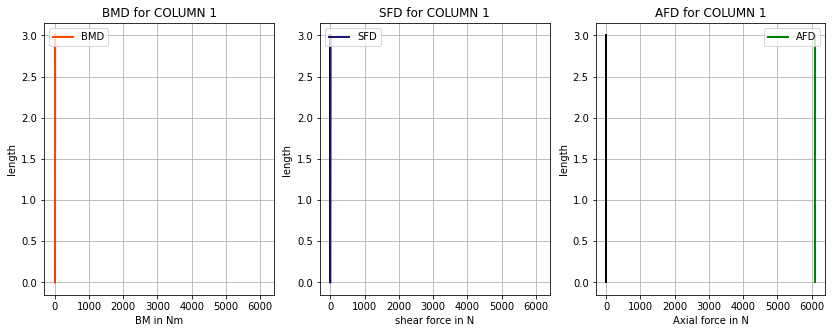

Member Force for beam
 [[ 4.56975115e+03]
 [ 4.28230211e+00]
 [ 1.37363440e+01]
 [-4.57248608e+03]
 [-6.88692237e+00]
 [ 1.38113454e+01]]
Member Displacement for beam
 [[ 2.17672315e+03]
 [-1.25998259e+00]
 [ 8.67701828e+02]
 [ 6.51175050e-01]
 [ 0.00000000e+00]
 [ 8.81987812e+02]]


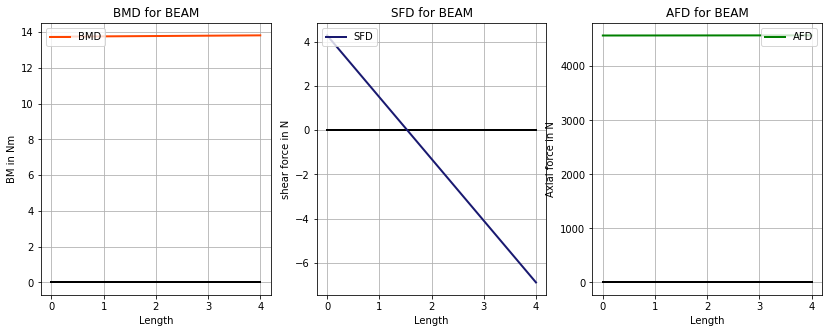

Member Force for column1
 [[-2.05797156]
 [ 1.82329014]
 [ 6.17391468]
 [ 6.17391468]
 [ 1.82329014]
 [12.34782936]]
Member Displacement for column 1
 [[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-6.51175050e-01]
 [ 8.81987812e+02]]


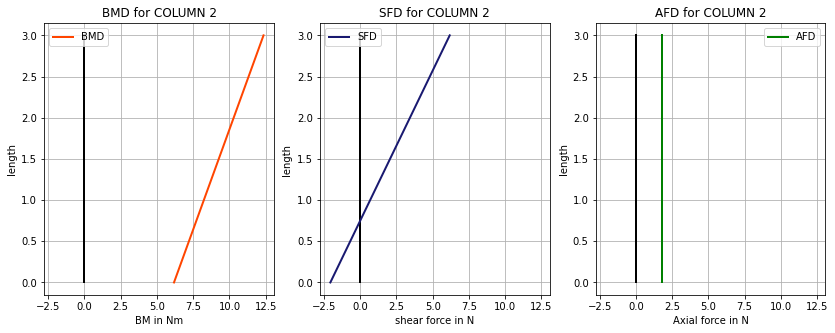

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tkinter import *
import math

E = 210 #GPa
A= 2 * 0.02 # m2
I = 5 * 0.00001 #m-4
P = 20 #kN
M = 12 #kN.m
L_BEAM= 4 #m
L_COL=3 #m

# finding local stiffness matrix
KL1= np.array([[E*A/L_COL,0,0,-E*A/L_COL,0,0 ],
                     [0,12*E*I/L_COL**3,6*E*I/L_COL**2,0,-12*E*I/L_COL**3, 6*E*I/L_COL**3],
                     [0, 6*E*I/L_COL**2, 4*E*I/L_COL,0,-6*E*I/L_COL**2,2*E*I/L_COL],
                     [-E*A/L_COL,0,0,-E*A/L_COL,0,0],
                     [0,-12*E*I/L_COL**3,-6*E*I/L_COL**2,0,12*E*I/L_COL**3,-6*E*I/L_COL**2],
                     [0, 6*E*I/L_COL**2, 2*E*I/L_COL,0,6*E*I/L_COL**2, 4*E*I/L_COL]])

KL2= np.array([[E*A/L_BEAM,0,0,-E*A/L_BEAM,0,0 ],
                     [0,12*E*I/L_BEAM**3,6*E*I/L_BEAM**2,0,-12*E*I/L_BEAM**3, 6*E*I/L_BEAM**3],
                     [0, 6*E*I/L_BEAM**2, 4*E*I/L_BEAM,0,-6*E*I/L_BEAM**2,2*E*I/L_BEAM],
                     [-E*A/L_BEAM,0,0,-E*A/L_BEAM,0,0],
                     [0,-12*E*I/L_BEAM**3,-6*E*I/L_BEAM**2,0,12*E*I/L_BEAM**3,-6*E*I/L_BEAM**2],
                     [0, 6*E*I/L_BEAM**2, 2*E*I/L_BEAM,0,6*E*I/L_BEAM**2, 4*E*I/L_BEAM]])

R1= np.array([[0 ,1, 0],[-1, 0,0],[0,0,1]])
R3= R1
R2= np.array([[1,0,0],[0,1,0],[0,0,1]])

o= np.zeros((3,3))
T1= np.block([[R1, o], [o, R1]])
T2= np.block([[R2, o], [o, R2]])

KG1= np.transpose(T1) @ KL1 @ T1
KG3= KG1
KG2= np.transpose(T2) @ KL2 @ T2

members= [[3,1], [1,2],[4,2], [0,0]]

association_matrix= np.array([[3*members[0][0]-2, 3*members[0][0]-1, 3*members[0][0], 3*members[0][1]-2, 3*members[0][1]-1, 3*members[0][1]],
                 [3*members[1][0]-2, 3*members[1][0]-1, 3*members[1][0], 3*members[1][1]-2, 3*members[1][1]-1, 3*members[1][1]],
                 [3*members[2][0]-2, 3*members[2][0]-1, 3*members[2][0], 3*members[2][1]-2, 3*members[2][1]-1, 3*members[2][1]]])

TSM= np.zeros((12,12))

# ADDING KG1 AND KG3
for i in range(0,2):
    for j in range(0,6):
        for k in range(0,6):
            TSM[association_matrix[i][j]-1, association_matrix[i][k]-1] += round(KG1[j,k],3)

# ADDING KG2
for j in range(0,6):
    for k in range(0,6):
        TSM[association_matrix[2][j]-1, association_matrix[2][k]-1] += round(KG2[j,k],3)

print(f' Global stiffness matrix: \n{TSM}')
KPP= TSM[0:6, 0:6]        # Unrestrained
KXX= TSM[6:12,6:12]       # Restrained
print(f'KPP= \n{KPP} \n KXX= \n{KXX}\n')

KPX= TSM[0:6,6:12]
KXP= TSM[6:12,0:6]
print(f'KPX= \n{KPX} \n KXP= \n{KXP}')

load_matrix= np.zeros((6,1))    # 6 rows and 1 col
load_matrix[0][0]= P
load_matrix[5][0]= M

print(load_matrix)

UX= np.zeros((6,1))   # nodes 3 and 4
inv_stiffness = np.linalg.inv(TSM)

KPP_inverse=np.linalg.inv(KPP)
print(KPP_inverse.shape)

UP = KPP_inverse @ load_matrix
X = KXP@UP     # Reaction forces at Restrained nodes
Displacement =np.concatenate((UP, UX), axis=0)     # displacement of all nodes as per numbering.
Force =np.concatenate((load_matrix, X), axis=0)

print('Force Matrix \n',Force)
print('Displacement Matrix \n',Displacement)

u=np.zeros((6,1))    # Nodal displacements for each member.
k=1
for i in range (3):
    for j in range(6):
        u[j]=Displacement[association_matrix[i,j]-1]
    if i==1:
        u = T2 @ u
        f = KG2 @ u
        print('Member Force for beam\n', f)
        print('Member Displacement for beam\n', u)
        x1 = [0, L_BEAM]
        y1 = [f[2], f[5]]

        x2 = [0, L_BEAM]
        y2 = [f[1], f[4]]  #SFD

        x3 = [0, L_BEAM]
        y3= [f[0], -f[3]] #AFD

        fig, ((ax1, ax2,ax3)) = plt.subplots(nrows=1, ncols=3, sharex=True)
        fig.set_size_inches(14, 5)

        ax1.plot(x1, [0,0] , color='black', linewidth=2)
        ax1.plot(x1, y1, label='BMD', color="orangered", linewidth=2)  # Plot some data on the axes.
        ax1.set_xlabel('Length')  # Add an x-label to the axes.
        ax1.set_ylabel('BM in Nm')  # Add a y-label to the axes.
        ax1.set_title("BMD for BEAM")  # Add a title to the axes.
        ax1.legend(loc='upper left')  # Add a legend.
        ax1.grid(True)

        ax2.plot(x2, [0,0], color='black', linewidth=2)
        ax2.plot(x2, y2, label='SFD', color="midnightblue", linewidth=2)  # Plot some data on the axes.
        ax2.set_xlabel('Length')  # Add an x-label to the axes.
        ax2.set_ylabel('shear force in N')  # Add a y-label to the axes.
        ax2.set_title("SFD for BEAM")  # Add a title to the axes.
        ax2.legend(loc='upper left')  # Add a legend.
        ax2.grid(True)

        ax3.plot(x3, [0,0], color='black', linewidth=2)
        ax3.plot(x3, y3, label='AFD', color="green", linewidth=2)  # Plot some data on the axes.
        ax3.set_xlabel('Length')  # Add an x-label to the axes.
        ax3.set_ylabel('Axial force in N')  # Add an x-label to the axes.
        ax3.set_title("AFD for BEAM")  # Add a title to the axes.
        ax3.legend(loc='upper right')  # Add a legend.
        ax3.grid(True)
        plt.show()

    else:
        u = T1 @ u
        f = KG1 @ u
        print('Member Force for column1\n', f)
        print('Member Displacement for column 1\n', u)

        x1 = [0, L_COL]
        y1 = [f[2], f[5]]   # BMD

        x2 = [0, L_COL]
        y2 = [f[0], f[3]]    #SFD

        x3 = [0, L_COL]
        y3 = [f[1], f[4]]     #AFD

        fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharex=True)
        fig.set_size_inches(14, 5)

        ax1.plot([0,0], x1, color='black', linewidth=2)
        ax1.plot(y1, x1, label='BMD', color="orangered", linewidth=2)  # Plot some data on the axes.
        ax1.set_xlabel('BM in Nm')  # Add an x-label to the axes.
        ax1.set_ylabel('length')  # Add a y-label to the axes.
        ax1.set_title(f"BMD for COLUMN {k}")  # Add a title to the axes.
        ax1.legend(loc='upper left')  # Add a legend.
        ax1.grid(True)

        ax2.plot([0, 0], x2, color='black', linewidth=2)
        ax2.plot(y2, x2, label='SFD', color="midnightblue", linewidth=2)  # Plot some data on the axes.
        ax2.set_xlabel('shear force in N')  # Add an x-label to the axes.
        ax2.set_ylabel('length ')  # Add a y-label to the axes.
        ax2.set_title(f"SFD for COLUMN {k}")  # Add a title to the axes.
        ax2.legend(loc='upper left')  # Add a legend.
        ax2.grid(True)

        ax3.plot([0, 0], x3, color='black', linewidth=2)
        ax3.plot(y3, x3, label='AFD', color="green", linewidth=2)  # Plot some data on the axes.
        ax3.set_xlabel('Axial force in N')  # Add an x-label to the axes.
        ax3.set_ylabel('length')  # Add an x-label to the axes.
        ax3.set_title(f"AFD for COLUMN {k}")  # Add a title to the axes.
        ax3.legend(loc='upper right')  # Add a legend.
        ax3.grid(True)
        plt.show()

        k+=1













